In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime 
from math import sqrt
import seaborn as sns
%matplotlib inline

# DATASET

We choose the lisitngs data of of AirBnB's of both cities i.e. Seattle and boston

In [2]:
seattle = pd.read_csv('./seattlelistings.csv')
boston = pd.read_csv('./bostonlistings.csv')

# Business Questions:

These are the questions that I want to answer during this project on AirBNB Data

 - Is there any significant difference by price?
 - Is there any noticeable difference between Seattle and Boston Airbnb?
 - How well your model predicts data?

## Look into the Dataset

In [3]:
boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [136]:
boston['price'].describe()

count    3074.000000
mean      168.729018
std       114.010697
min        10.000000
25%        85.000000
50%       150.000000
75%       219.000000
max      1345.000000
Name: price, dtype: float64

In [137]:
seattle['price'].describe()

count    3235.000000
mean      120.001855
std        78.289518
min        22.000000
25%        70.000000
50%        99.000000
75%       149.000000
max       999.000000
Name: price, dtype: float64

In [171]:
boston['Private'].describe().freq

1898

In [149]:
{'Private':(3074-1898)/3074*100}

{'Private': 38.25634352635004}

In [176]:
boston['Entire'].describe().

<bound method Series.count of count     3074
unique       2
top       True
freq      1830
Name: Entire, dtype: object>

In [150]:
{'Entire':1830/3074*100}

{'Entire': 59.53155497722836}

In [140]:
boston['Shared'].describe()

count      3074
unique        2
top       False
freq       3006
Name: Shared, dtype: object

In [151]:
{'Shared':(3074-3006)/3074*100}

{'Shared': 2.2121014964216004}

In [163]:
room_boston=pd.DataFrame({
                          'Percentage':[(3074-1898)/3074*100,1830/3074*100,(3074-3006)/3074*100],
                          'Index':['Private','Entire','Shared']})

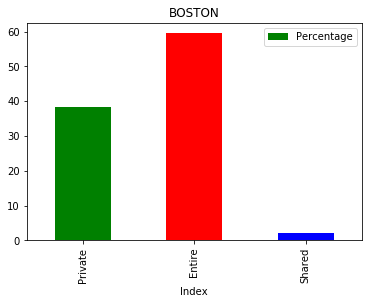

In [217]:
room_boston.set_index('Index').plot(kind='bar',color='grb',title='BOSTON');

In [201]:
seattle['Private'].describe()

count      3235
unique        2
top       False
freq       2254
Name: Private, dtype: object

In [202]:
{'Private':(3235-2254)/3235*100}

{'Private': 30.324574961360124}

In [203]:
seattle['Entire'].describe()

count     3235
unique       2
top       True
freq      2147
Name: Entire, dtype: object

In [204]:
{'Entire':2147/3235*100}

{'Entire': 66.36785162287481}

In [205]:
seattle['Shared'].describe()

count      3235
unique        2
top       False
freq       3128
Name: Shared, dtype: object

In [206]:
{'Shared':(3235-3128)/3235*100}

{'Shared': 3.307573415765069}

In [207]:
room_seattle=pd.DataFrame({
                          'Percentage':[(3235-2254)/3235*100,2147/3235*100,(3235-3128)/3235*100],
                          'Index':['Private','Entire','Shared']})

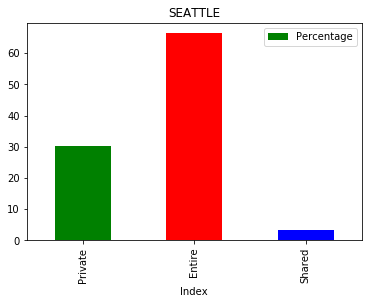

In [216]:
room_seattle.set_index('Index').plot(kind='bar',color='grb',title='SEATTLE');

## Data Wrangling (Preparing Data To Answer our Questions)

## 1). Cleaning the DATA and Handling Categorical vlaues

In [6]:
def clean_data(df):
    print(df.info())
    # Create some extra features based on amenities
    df['TV'] = df.amenities.str.contains("tv", case=False)
    df['Internet'] = df.amenities.str.contains('internet|wireless', case=False)
    df['Parking'] = df.amenities.str.contains('parking', case=False)
    df['Washer'] = df.amenities.str.contains('washer', case=False)
    df['Dryer'] = df.amenities.str.contains('dryer', case=False)
    df['AirCon'] = df.amenities.str.contains('air condition|air conditioning', case=False)
    
    df['host_is_superhost']=df.host_is_superhost.str.contains('t',case=False)
    df['host_identity_verified']=df.host_identity_verified.str.contains('t',case=False)
    df['instant_bookable']=df.instant_bookable.str.contains('t',case=False)


    df['Luxury'] = df.property_type.str.contains('House|Villa|Townhouse|Guesthouse|Boat', case=False)
    df['Standard'] = df.property_type.str.contains('Apartment|Condomium|Entire Floor', case=False)
    df['Economy'] = df.property_type.str.contains('Dorm|Loft|Bed&Breakfast', case=False)
    df['Other'] = df.property_type.str.contains('Other', case=False)



    df['Private'] = df.room_type.str.contains('Private room', case=False)
    df['Entire'] = df.room_type.str.contains('Entire home/apt', case=False)
    df['Shared'] = df.room_type.str.contains('Shared room', case=False)


    df['RealBed'] = df.bed_type.str.contains('Real Bed', case=False)
    df['Pull-outSofa'] = df.bed_type.str.contains('Pull-out Sofa', case=False)
    df['Futon'] = df.bed_type.str.contains('Futon', case=False)
    df['Airbed'] = df.bed_type.str.contains('Airbed', case=False)
    df['Couch'] = df.bed_type.str.contains('Couch', case=False)


    df['Moderate'] = df.cancellation_policy.str.contains('moderate', case=False)
    df['Flexible'] = df.cancellation_policy.str.contains('flexible', case=False)
    df['Strict'] = df.cancellation_policy.str.contains('strict', case=False)
    df['Super_strict'] = df.cancellation_policy.str.contains('super_strict_30', case=False)
    
    df['Withinahour'] = df.host_response_time.str.contains('within an hour', case=False)
    df['WithinfewHour'] = df.host_response_time.str.contains('within a few hours', case=False)
    df['Withinaday'] = df.host_response_time.str.contains('within a day', case=False)
    df['FewDays'] = df.host_response_time.str.contains('a few days or more', case=False)
    
    df.drop(['property_type','room_type','bed_type','cancellation_policy','host_response_time'],axis=1,inplace=True)

    
    # Visualize missing values
    # List comprehensions for headers and corresponding missing values where series has missing values
    missing_percent = [(df[series].isnull().sum()/len(df[series]))*100 for series in list(df) ]
    headers_missing = [series for series in list(df)  ]

    mean = np.mean(missing_percent)
    fig, ax = plt.subplots(figsize=(15,10))
    plt.title("Missing values for each column")
    plt.xlabel("Columns")
    plt.ylabel("Missing values")
    plt.axhline(y=mean, c='r', label='"Mean"')

    ax.annotate('Mean', xy=(0, mean), xytext=(3, 20),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    plt.bar(headers_missing, missing_percent)
    plt.xticks(rotation=90);
    
    
    
    
   
    
    return df, missing_percent,headers_missing
    
    
    

In [7]:
# Remove outlier columns
def remove_outlier_col(df, thresh):
    """
    Function to identify outlier columns. 
    Takes dataframe and outlier threshold as input, returns two lists. 
    First list identifies the columns and the second contains coresponding number of missing values
    """
    outlier_columns = []
    outlier_value = []
    for i in list(df):
        if ((df[i].isnull().sum() / len(df[i])) > thresh):
           
            outlier_columns.append(i)
            outlier_value.append(df[i].isnull().sum())
        
    return outlier_columns, outlier_value

In [8]:
def convert_numeric(df):
    # Convert to numeric values
    df.host_response_rate = df.host_response_rate.str.replace("%", "")
    df.host_response_rate = pd.to_numeric(df.host_response_rate)

    df.price = df.price.str.replace("$", "")
    df.price = df.price.str.replace(",", "")
    df.price = pd.to_numeric(df.price)

    df.extra_people = df.extra_people.str.replace("$", "")
    df.extra_people = pd.to_numeric(df.extra_people);
    
    return df

In [9]:
def heat_map(df,x=25,y=25):
    fig, ax = plt.subplots(figsize=(x,y))
    sns.heatmap(df.corr(), annot=True, fmt='.2f');

## Firstly, Boston

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

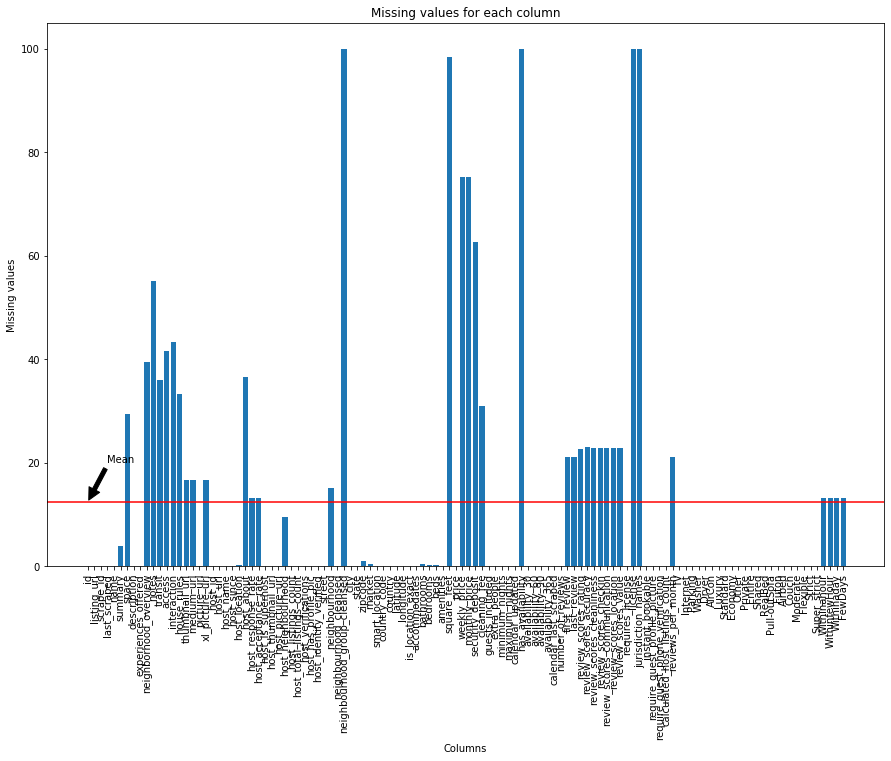

In [10]:
boston,missing_per_boston,headers_missing_boston=clean_data(boston)

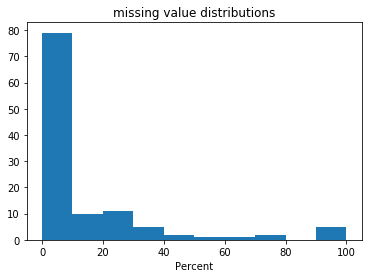

In [11]:
# Get a missingvalue distribution in order to set a cut-off point for missing values
plt.title("missing value distributions")
plt.xlabel("Percent")
plt.hist(missing_per_boston);

In [12]:
outlier_col_bos, outlier_value_bos = remove_outlier_col(boston, 0.2)

In [13]:
for i in zip(outlier_col_bos, outlier_value_bos):
    print(i)

('space', 1057)
('neighborhood_overview', 1415)
('notes', 1975)
('transit', 1290)
('access', 1489)
('interaction', 1554)
('house_rules', 1192)
('host_about', 1309)
('neighbourhood_group_cleansed', 3585)
('square_feet', 3529)
('weekly_price', 2693)
('monthly_price', 2697)
('security_deposit', 2243)
('cleaning_fee', 1107)
('has_availability', 3585)
('first_review', 756)
('last_review', 756)
('review_scores_rating', 813)
('review_scores_accuracy', 823)
('review_scores_cleanliness', 818)
('review_scores_checkin', 820)
('review_scores_communication', 818)
('review_scores_location', 822)
('review_scores_value', 821)
('license', 3585)
('jurisdiction_names', 3585)
('reviews_per_month', 756)


In [14]:
boston.drop(outlier_col_bos, axis=1, inplace=True)

# Categorical Values

In [15]:
# I used this cell for analyzing which string columns to keep and which to drop
list(boston.select_dtypes(include=['object']))

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'description',
 'experiences_offered',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_response_rate',
 'host_acceptance_rate',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'amenities',
 'price',
 'extra_people',
 'calendar_updated',
 'calendar_last_scraped',
 'requires_license',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'Luxury',
 'Standard',
 'Economy',
 'Other',
 'Withinahour',
 'WithinfewHour',
 'Withinaday',
 'FewDays']

### Theese are the features i decided to reencode and to make numeric out of the categorical features. 

In [16]:
# Decision is based on data distribution in each feature. whether another feature allready explains the same and how relevant i belive
# the feature is.

one_hot_encode = ['cancellation_policy', 'neighbourhood_group_cleansed', 'property_type', 'bed_type', 'host_identity_verified',
                  'host_response_time', 'host_is_superhost', 'room_type', 'instant_bookable']
    
make_numeric = ['host_response_rate', 'price', 'extra_people' ]    
    

In [17]:
drop_num = ['id', 'host_id', 'latitude', 'longitude']

drop_object = [i for i in list(boston.select_dtypes(include=['object'])) if i not in make_numeric + one_hot_encode + outlier_col_bos]

In [18]:
boston.drop(drop_num + drop_object, axis=1, inplace=True)

In [19]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 40 columns):
scrape_id                         3585 non-null int64
host_response_rate                3114 non-null object
host_is_superhost                 3585 non-null bool
host_listings_count               3585 non-null int64
host_total_listings_count         3585 non-null int64
host_identity_verified            3585 non-null bool
accommodates                      3585 non-null int64
bathrooms                         3571 non-null float64
bedrooms                          3575 non-null float64
beds                              3576 non-null float64
price                             3585 non-null object
guests_included                   3585 non-null int64
extra_people                      3585 non-null object
minimum_nights                    3585 non-null int64
maximum_nights                    3585 non-null int64
availability_30                   3585 non-null int64
availability_60       

## Visualizing Correlations through HeatMap

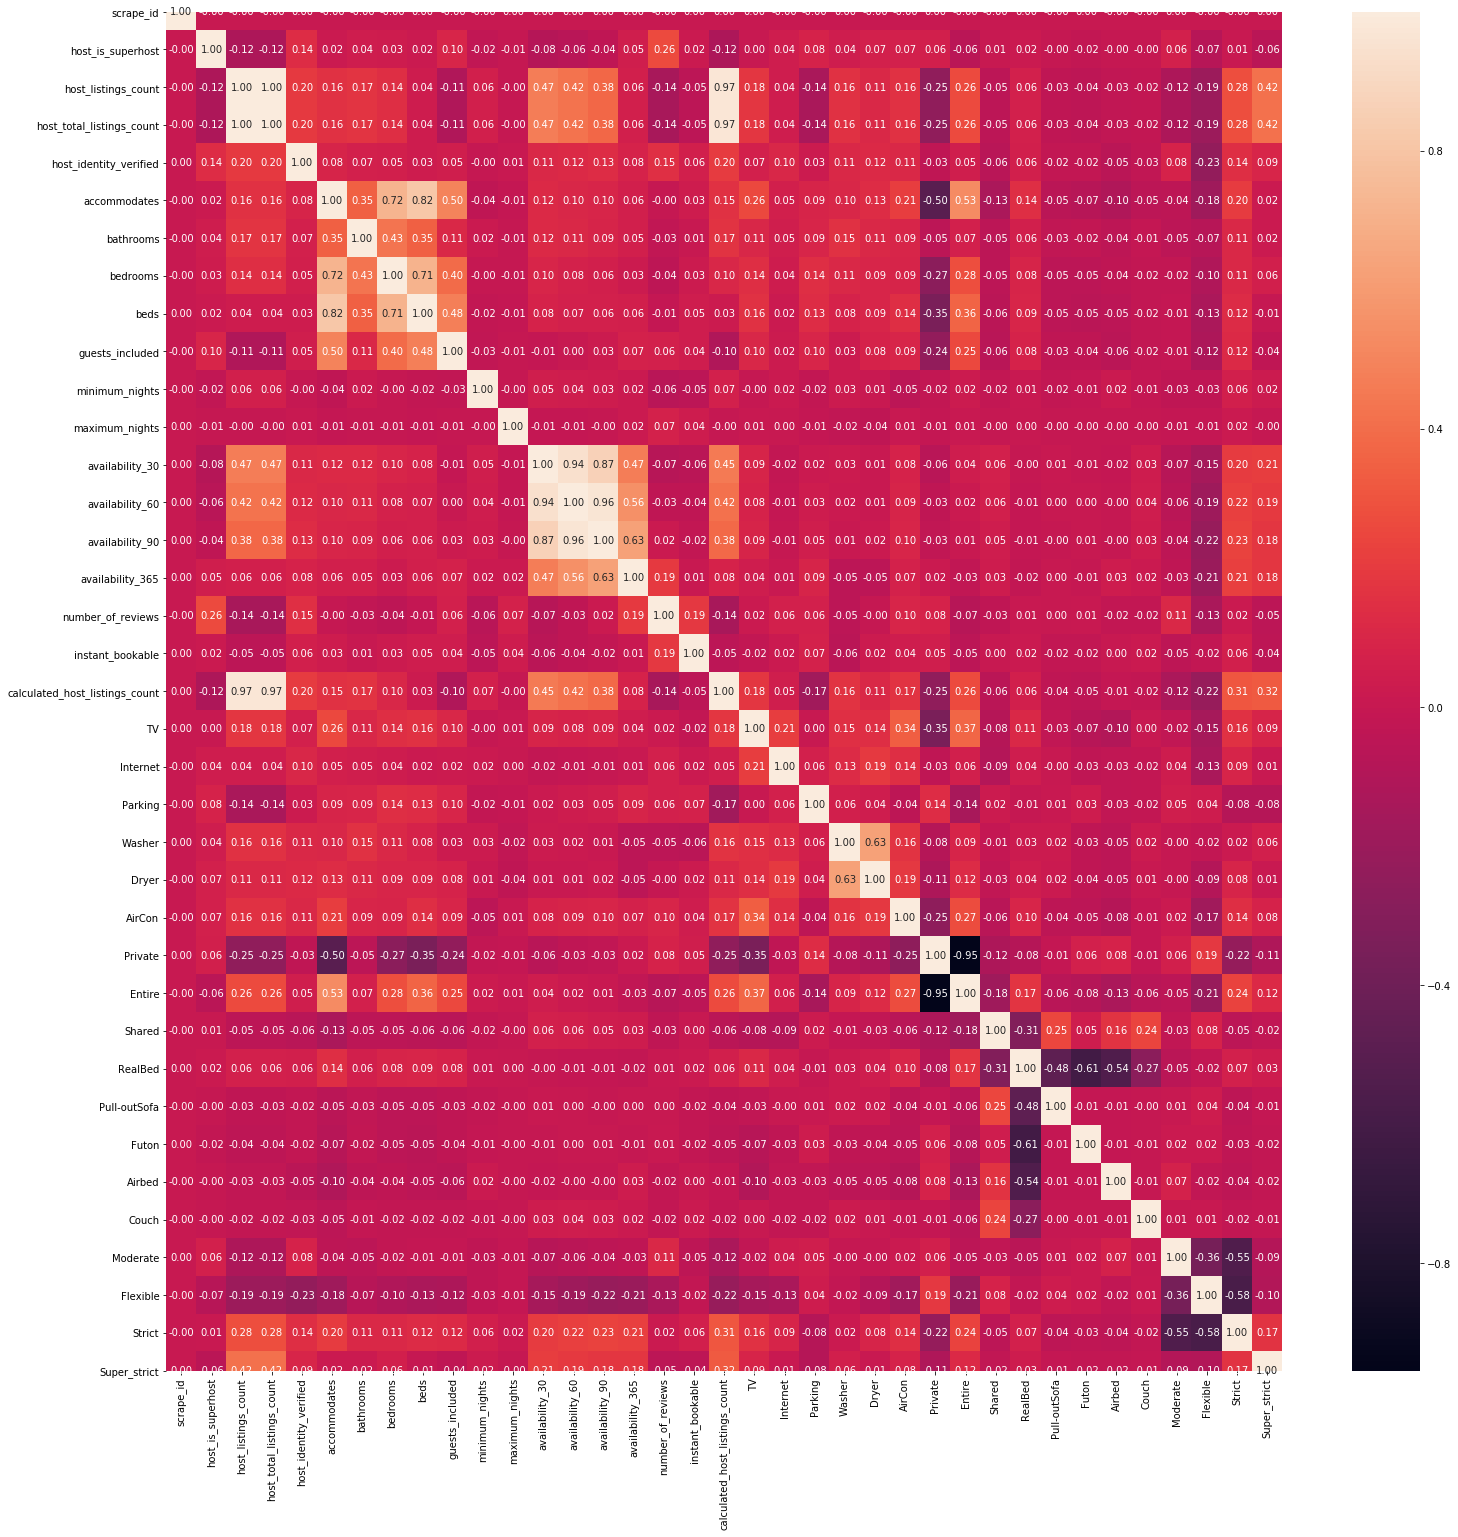

In [20]:
heat_map(boston)

In [21]:
highcorr = ['beds', 'bedrooms', 'availability_60', 'availability_90', 'availability_365', 'Dryer','host_listings_count','calculated_host_listings_count']

boston.drop(highcorr, axis=1, inplace=True)

In [22]:
boston=convert_numeric(boston)

''

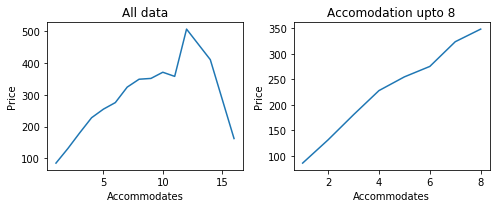

In [23]:
accom = pd.DataFrame(boston.groupby("accommodates")['price'].mean(), columns=['price'])

f,a = plt.subplots(figsize=(7,3))
plt.subplot(1,2,1)
plt.title("All data")
plt.ylabel("Price")
plt.xlabel("Accommodates")
plt.plot(accom)

plt.subplot(1,2,2)
plt.title("Accomodation upto 8")
plt.ylabel("Price")
plt.xlabel("Accommodates")
plt.plot(accom[:8])

plt.tight_layout()
;


In [24]:
boston=boston[boston.accommodates<=8]

## NEW HEATMAP

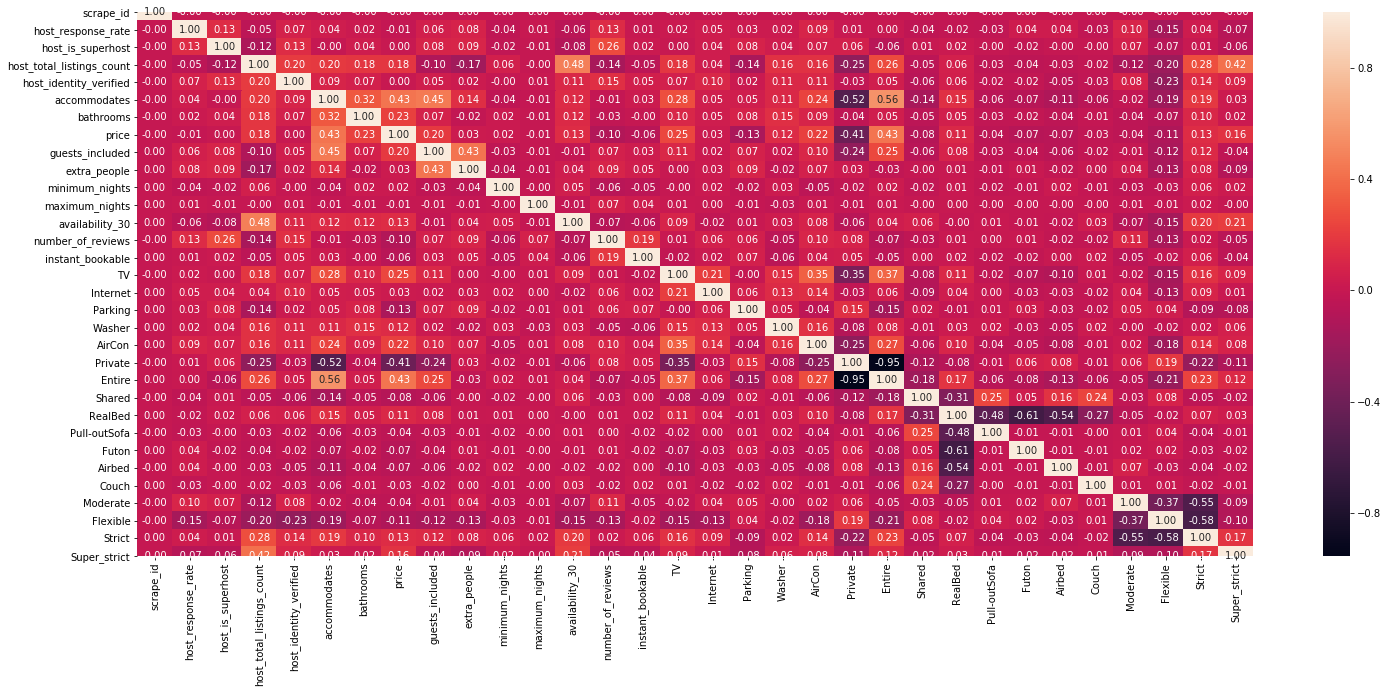

In [25]:
heat_map(boston,25,10)

# Now, Seattle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

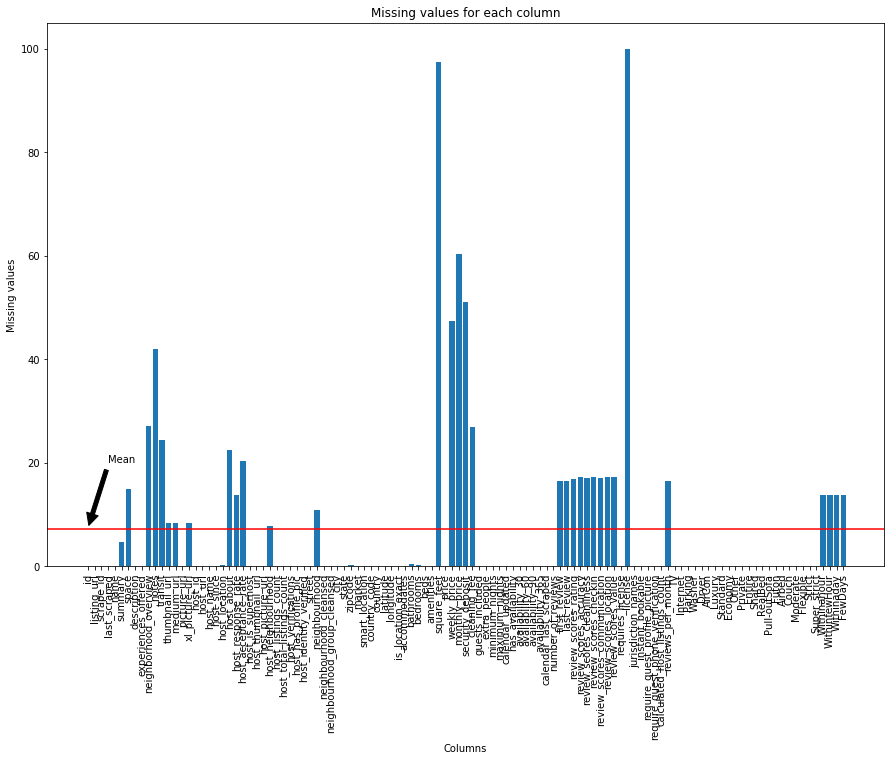

In [26]:
seattle,missing_per_seattle,headers_missing_seattle=clean_data(seattle)

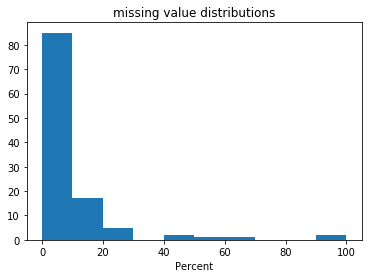

In [27]:
# Get a missingvalue distribution in order to set a cut-off point for missing values
plt.title("missing value distributions")
plt.xlabel("Percent")
plt.hist(missing_per_seattle);

In [28]:
outlier_col_bos, outlier_value_bos = remove_outlier_col(seattle, 0.2)

In [29]:
for i in zip(outlier_col_bos, outlier_value_bos):
    print(i)

('neighborhood_overview', 1032)
('notes', 1606)
('transit', 934)
('host_about', 859)
('host_acceptance_rate', 773)
('square_feet', 3721)
('weekly_price', 1809)
('monthly_price', 2301)
('security_deposit', 1952)
('cleaning_fee', 1030)
('license', 3818)


In [30]:
seattle.drop(outlier_col_bos, axis=1, inplace=True)

# Categorical Values

In [31]:
# I used this cell for analyzing which string columns to keep and which to drop
list(seattle.select_dtypes(include=['object']))

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_response_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'amenities',
 'price',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'requires_license',
 'jurisdiction_names',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'Luxury',
 'Standard',
 'Economy',
 'Other',
 'Withinahour',
 'WithinfewHour',
 'Withinaday',
 'FewDays']

### Theese are the features i decided to reencode and to make numeric out of the categorical features. 

In [32]:
# Decision is based on data distribution in each feature. whether another feature allready explains the same and how relevant i belive
# the feature is.

one_hot_encode = ['cancellation_policy', 'neighbourhood_group_cleansed', 'property_type', 'bed_type', 'host_identity_verified',
                  'host_response_time', 'host_is_superhost', 'room_type', 'instant_bookable']
    
make_numeric = ['host_response_rate', 'price', 'extra_people' ]    

In [33]:
drop_num = ['id', 'host_id', 'latitude', 'longitude', 'review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_communication', 'review_scores_location', 'review_scores_checkin','review_scores_value', 
            'reviews_per_month', 'calculated_host_listings_count']

drop_object = [i for i in list(seattle.select_dtypes(include=['object'])) if i not in make_numeric + one_hot_encode + outlier_col_bos]

seattle.drop(drop_num + drop_object, axis=1, inplace=True)

In [34]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 41 columns):
scrape_id                       3818 non-null int64
host_response_rate              3295 non-null object
host_is_superhost               3816 non-null object
host_listings_count             3816 non-null float64
host_total_listings_count       3816 non-null float64
host_identity_verified          3816 non-null object
neighbourhood_group_cleansed    3818 non-null object
accommodates                    3818 non-null int64
bathrooms                       3802 non-null float64
bedrooms                        3812 non-null float64
beds                            3817 non-null float64
price                           3818 non-null object
guests_included                 3818 non-null int64
extra_people                    3818 non-null object
minimum_nights                  3818 non-null int64
maximum_nights                  3818 non-null int64
availability_30                 3818 non-null

In [35]:
seattle=convert_numeric(seattle)

## Visualizing Correlations through HeatMap

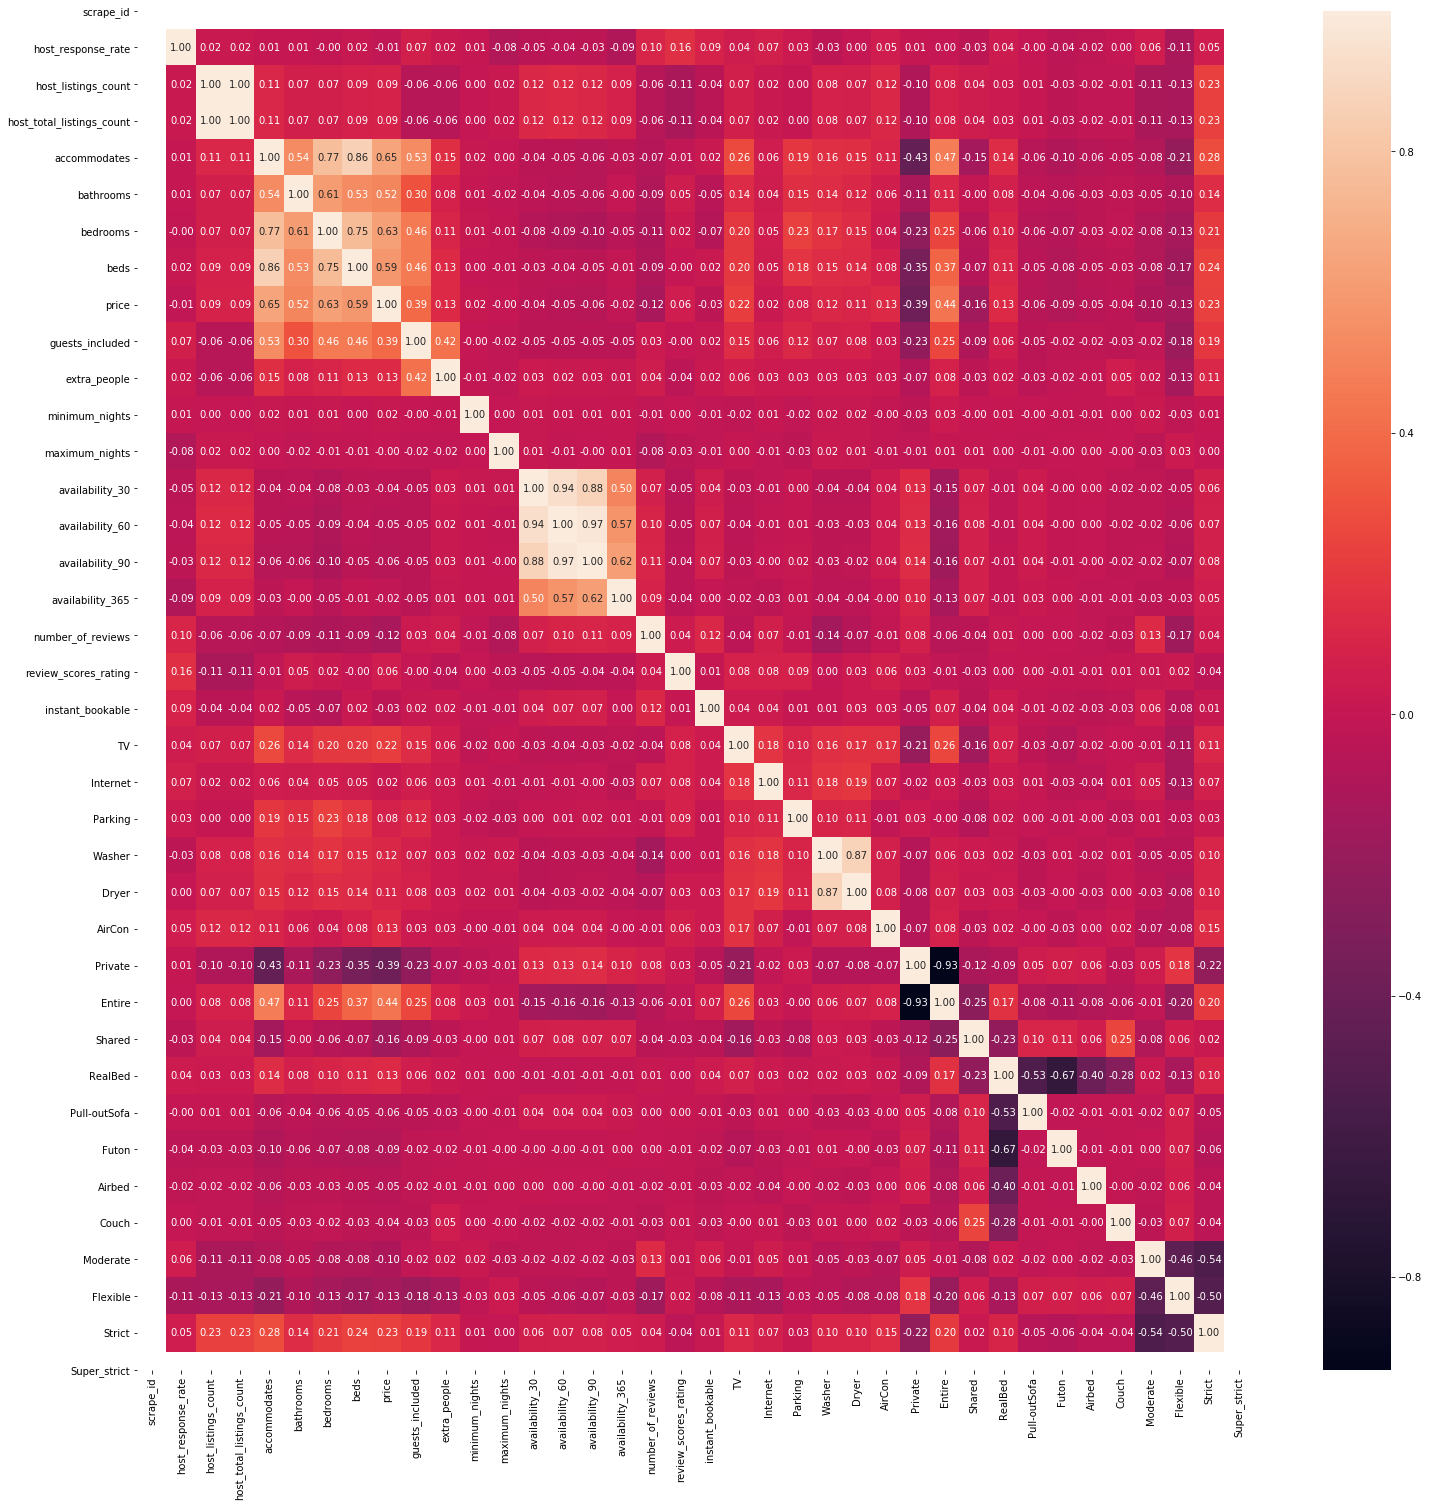

In [36]:
heat_map(seattle)

In [37]:
highcorr = ['beds', 'bedrooms', 'availability_60', 'availability_90', 'availability_365', 'Dryer','host_listings_count']

seattle.drop(highcorr, axis=1, inplace=True)

I saw that the "Accommodates" feature was highly correlated with price but it seems to be some outlier datapoints in this feature. 1 listing can accommodate 11 people and the price ( 1000 $ ) is by far the highets of them all. I therfore decided to only keep rows with accommodation upto 8 people

''

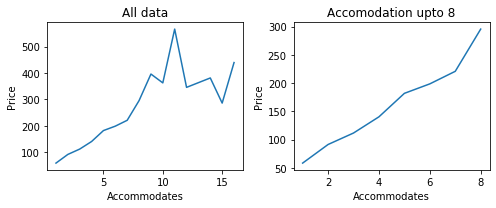

In [38]:
accom = pd.DataFrame(seattle.groupby("accommodates")['price'].mean(), columns=['price'])

f,a = plt.subplots(figsize=(7,3))
plt.subplot(1,2,1)
plt.title("All data")
plt.ylabel("Price")
plt.xlabel("Accommodates")
plt.plot(accom)

plt.subplot(1,2,2)
plt.title("Accomodation upto 8")
plt.ylabel("Price")
plt.xlabel("Accommodates")
plt.plot(accom[:8])

plt.tight_layout()
;

In [39]:
seattle=seattle[seattle.accommodates<=8]

## NEW HEATMAP

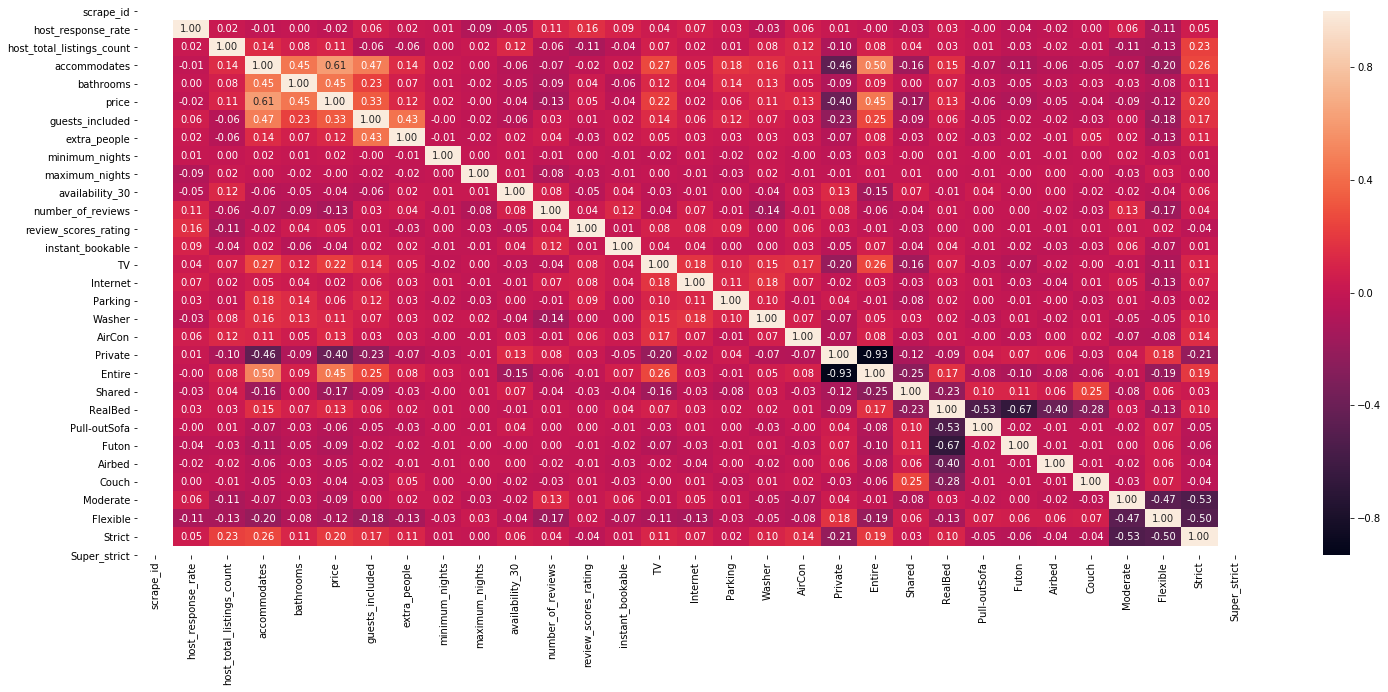

In [40]:
heat_map(seattle,25,10)

## Let's See for Null Values for BOSTON

In [41]:
boston.isnull().sum()

scrape_id                      0
host_response_rate           468
host_is_superhost              0
host_total_listings_count      0
host_identity_verified         0
accommodates                   0
bathrooms                     14
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
availability_30                0
number_of_reviews              0
instant_bookable               0
TV                             0
Internet                       0
Parking                        0
Washer                         0
AirCon                         0
Private                        0
Entire                         0
Shared                         0
RealBed                        0
Pull-outSofa                   0
Futon                          0
Airbed                         0
Couch                          0
Moderate                       0
Flexible                       0
Strict    

In [42]:
seattle.isnull().sum()

scrape_id                         0
host_response_rate              518
host_is_superhost                 2
host_total_listings_count         2
host_identity_verified            2
neighbourhood_group_cleansed      0
accommodates                      0
bathrooms                        16
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
number_of_reviews                 0
review_scores_rating            640
instant_bookable                  0
TV                                0
Internet                          0
Parking                           0
Washer                            0
AirCon                            0
Private                           0
Entire                            0
Shared                            0
RealBed                           0
Pull-outSofa                      0
Futon                       

In [43]:
boston.dropna(subset=['host_response_rate'],axis=0,inplace=True)
boston.isnull().any()

scrape_id                    False
host_response_rate           False
host_is_superhost            False
host_total_listings_count    False
host_identity_verified       False
accommodates                 False
bathrooms                     True
price                        False
guests_included              False
extra_people                 False
minimum_nights               False
maximum_nights               False
availability_30              False
number_of_reviews            False
instant_bookable             False
TV                           False
Internet                     False
Parking                      False
Washer                       False
AirCon                       False
Private                      False
Entire                       False
Shared                       False
RealBed                      False
Pull-outSofa                 False
Futon                        False
Airbed                       False
Couch                        False
Moderate            

In [44]:
boston.drop('scrape_id',axis=1,inplace=True)
boston.isnull().any()

host_response_rate           False
host_is_superhost            False
host_total_listings_count    False
host_identity_verified       False
accommodates                 False
bathrooms                     True
price                        False
guests_included              False
extra_people                 False
minimum_nights               False
maximum_nights               False
availability_30              False
number_of_reviews            False
instant_bookable             False
TV                           False
Internet                     False
Parking                      False
Washer                       False
AirCon                       False
Private                      False
Entire                       False
Shared                       False
RealBed                      False
Pull-outSofa                 False
Futon                        False
Airbed                       False
Couch                        False
Moderate                     False
Flexible            

In [45]:
boston['bathrooms'].fillna(boston['bathrooms'].mean(),inplace=True)
boston.isnull().any()

host_response_rate           False
host_is_superhost            False
host_total_listings_count    False
host_identity_verified       False
accommodates                 False
bathrooms                    False
price                        False
guests_included              False
extra_people                 False
minimum_nights               False
maximum_nights               False
availability_30              False
number_of_reviews            False
instant_bookable             False
TV                           False
Internet                     False
Parking                      False
Washer                       False
AirCon                       False
Private                      False
Entire                       False
Shared                       False
RealBed                      False
Pull-outSofa                 False
Futon                        False
Airbed                       False
Couch                        False
Moderate                     False
Flexible            

## Let's See for Null Values for SEATTLE

In [46]:
seattle.dropna(subset=['host_response_rate','host_is_superhost','host_total_listings_count','host_identity_verified'],axis=0,inplace=True)
seattle.isnull().any()

scrape_id                       False
host_response_rate              False
host_is_superhost               False
host_total_listings_count       False
host_identity_verified          False
neighbourhood_group_cleansed    False
accommodates                    False
bathrooms                        True
price                           False
guests_included                 False
extra_people                    False
minimum_nights                  False
maximum_nights                  False
availability_30                 False
number_of_reviews               False
review_scores_rating             True
instant_bookable                False
TV                              False
Internet                        False
Parking                         False
Washer                          False
AirCon                          False
Private                         False
Entire                          False
Shared                          False
RealBed                         False
Pull-outSofa

In [47]:
seattle['bathrooms'].fillna(seattle['bathrooms'].mean(),inplace=True)
seattle.isnull().any()

scrape_id                       False
host_response_rate              False
host_is_superhost               False
host_total_listings_count       False
host_identity_verified          False
neighbourhood_group_cleansed    False
accommodates                    False
bathrooms                       False
price                           False
guests_included                 False
extra_people                    False
minimum_nights                  False
maximum_nights                  False
availability_30                 False
number_of_reviews               False
review_scores_rating             True
instant_bookable                False
TV                              False
Internet                        False
Parking                         False
Washer                          False
AirCon                          False
Private                         False
Entire                          False
Shared                          False
RealBed                         False
Pull-outSofa

In [48]:
seattle.drop(['scrape_id','review_scores_rating','Super_strict','neighbourhood_group_cleansed'],axis=1,inplace=True)
seattle.isnull().any()

host_response_rate           False
host_is_superhost            False
host_total_listings_count    False
host_identity_verified       False
accommodates                 False
bathrooms                    False
price                        False
guests_included              False
extra_people                 False
minimum_nights               False
maximum_nights               False
availability_30              False
number_of_reviews            False
instant_bookable             False
TV                           False
Internet                     False
Parking                      False
Washer                       False
AirCon                       False
Private                      False
Entire                       False
Shared                       False
RealBed                      False
Pull-outSofa                 False
Futon                        False
Airbed                       False
Couch                        False
Moderate                     False
Flexible            

## LET'S MAKE PRICE NUMERIC 

In [49]:
def avg_price(df):
    start=datetime.now()
    mean=df['price'].mean()
    print(datetime.now()-start)
    print(mean)
    return mean

In [50]:
mean_boston=avg_price(boston)

0:00:00
168.72901756668836


In [51]:
mean_seattle=avg_price(seattle)

0:00:00.000983
120.00185471406492


## Is there any significant difference by price?

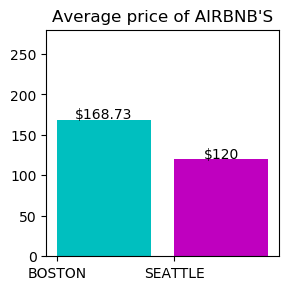

In [231]:
plt.figure(figsize=(3,3),dpi=100)
plt.bar(x=['BOSTON','SEATTLE'],height=[mean_boston,mean_seattle],color=['c','m'],align='edge')
plt.title('Average price of AIRBNB\'S')
plt.ylim(0,280)
plt.annotate(s="$168.73",xy=(0.15,169.83))
plt.annotate(s="$120",xy=(1.25,120.5))
plt.show();

### Calculating Variance and Standard Deviation


In [53]:
from statistics import stdev 

In [54]:
std_boston=stdev(boston['price'])
std_boston

114.01069718714531

In [55]:
var_boston=(std_boston)**2
var_boston

12998.439073098943

In [56]:
std_seattle=stdev(seattle['price'])
std_seattle

78.28951784941133

In [57]:
var_seattle=(std_seattle)**2
var_seattle

6129.248605093295

## Hypothesis Testing :

### Null Hypothesis(H0): Mean1=Mean2
### Alternate Hypothesis(H1): Mean1 =! Mean2


In [58]:
n2=len(seattle['price'])
n2

3235

In [59]:
n1=len(boston['price'])
n1

3074

In [60]:
from math import sqrt

In [61]:
# calculating standard error
s_e=sqrt((var_boston/n1)+(var_seattle/n2))
s_e

2.4745054150117034

In [62]:
# standard error used to calculate Z-test value
Z=(-mean_seattle+mean_boston)/s_e
Z

19.691677600306637

### Z-score
#### As we can observe the value is not in the range of -1.96 to 1.96 i.e. the range for 95% C.I. 

#### Critical region = |Zc|>0.06
#### |Z| = 19.68

#### Since it is observed that |z| = 19.388 > Zc = 0.06∣z∣=19.388>zc=0.06, it is then concluded that the null hypothesis is rejected.

#### Using the P-value approach: The p-value is p = 0p=0, and           
#### since p = 0 < 0.95, it is concluded that the null hypothesis is rejected.

#### So, We can conclude the difference between the two means is significant and so, we can proceed to further to check the reason


# Now, we will see how price is related to other features

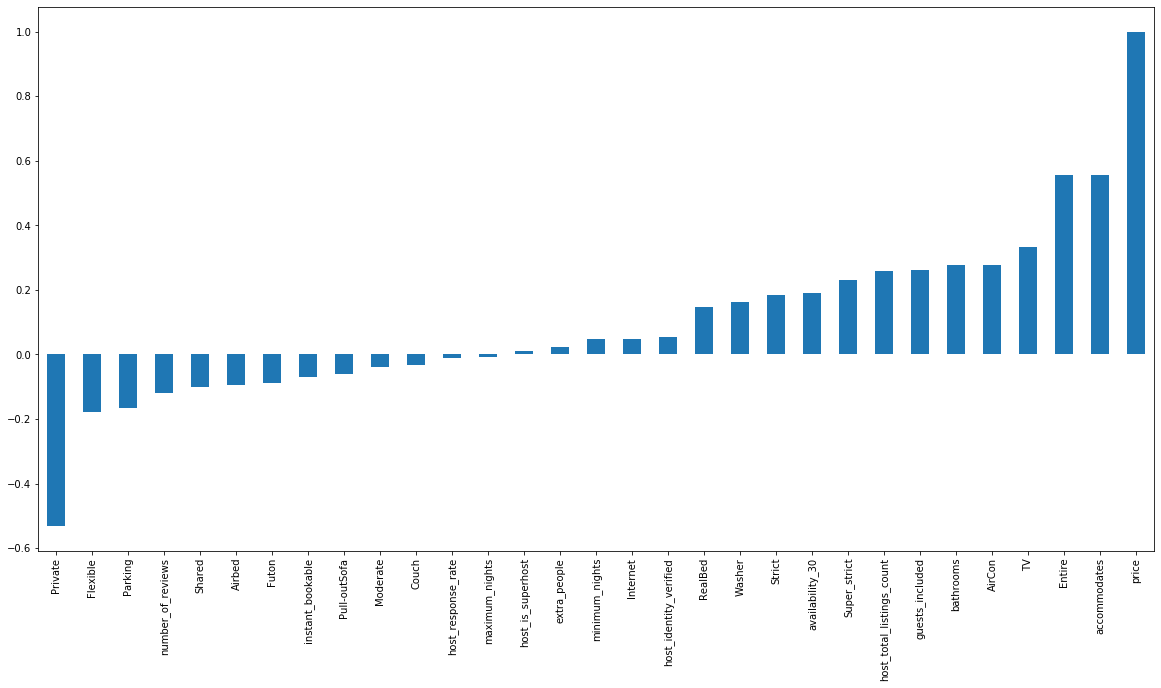

In [63]:
boston.corr().loc['price',:].sort_values().plot(kind='bar',figsize=(20,10));

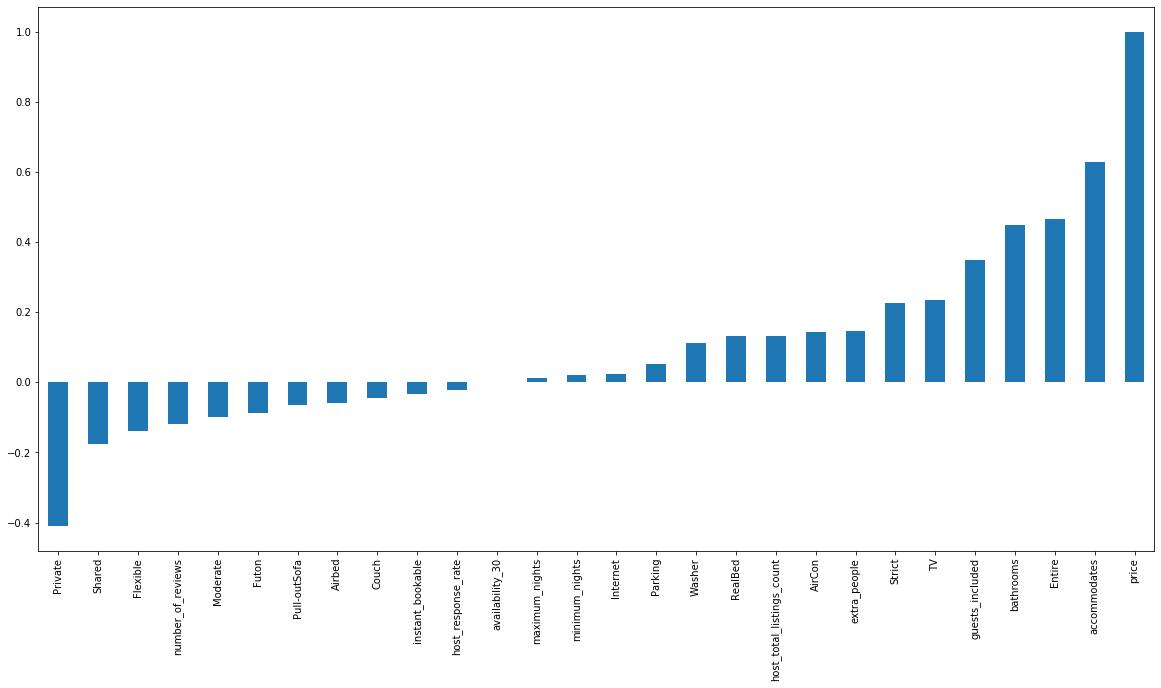

In [64]:
seattle.corr().loc['price',:].sort_values().plot(kind='bar',figsize=(20,10));

#### We shall, observe trends for Availability,parking.

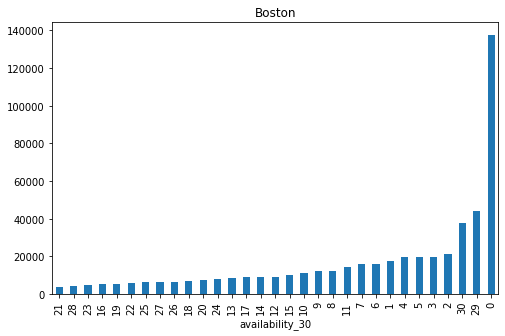

In [65]:
boston.groupby('availability_30')['price'].sum().sort_values().plot(kind='bar',figsize=(8,5),title='Boston');

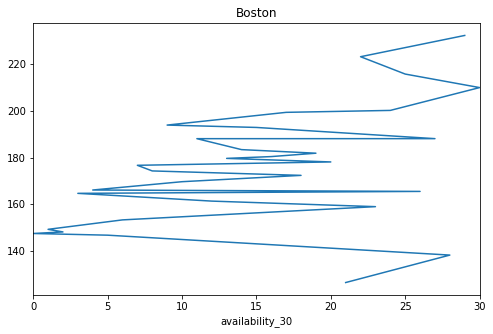

In [66]:
boston.groupby('availability_30')['price'].mean().sort_values().plot(kind='line',figsize=(8,5),title='Boston');

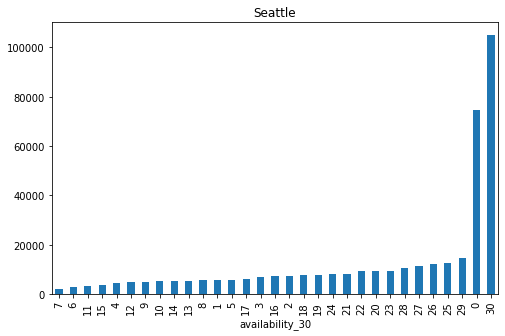

In [67]:
seattle.groupby('availability_30')['price'].sum().sort_values().plot(kind='bar',figsize=(8,5),title='Seattle');

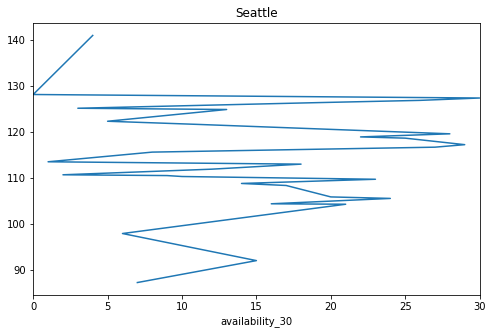

In [68]:
seattle.groupby('availability_30')['price'].mean().sort_values().plot(kind='line',figsize=(8,5),title='Seattle');

### Availability Column 

    |FEATURES|DAYS                  | SEATTLE    | BOSTON  |
    |Constant|Throughout the month  |$128-$112   |$162-$140|
    |High/low|Start of month        |$130-$140   |$235-$220|
    |Low/High|End of month          |$$128-$126  |$142-$140|
    
## Seattle has more constant pricing therefore it has medium pricing throughout the month
## Boston has more rigrous pricing in start of the month and has dynamic low pricing in end of month.

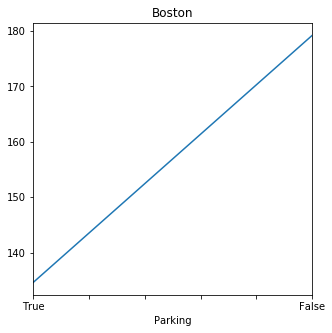

In [69]:
# we are now looking for parking feature
boston.groupby('Parking')['price'].mean().sort_values().plot(figsize=(5,5),title='Boston');

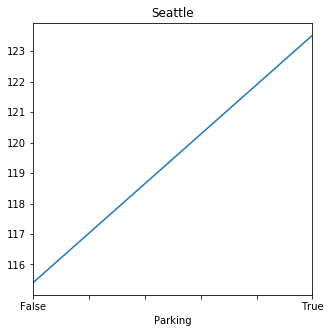

In [70]:
seattle.groupby('Parking')['price'].mean().sort_values().plot(figsize=(5,5),title='Seattle');

### We can say that parking feature isn't needed for pricing in BOSTON as people don't pay less for no parking Airbnb maybe long-bookings can be reason for high-priced hotels as we saw that Boston has start of the month at higher rates

In [130]:
# we will fit the model using linear regression and train_test_split
def model_fit(features,target):
   
    # Split to training set and testing set
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3,random_state=38)


    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)
    rtest_score=r2_score(y_test, y_test_preds)
    rtrain_score=r2_score(y_train, y_train_preds)
        
    return rtest_score,rtrain_score,lm_model


### Boston Model

In [124]:
features_b=boston.drop('price',axis=1).copy()
target_b=boston.price.copy()

In [131]:
rtest_boston,rtrain_boston,lm_model=model_fit(features_b,target_b)
print(rtest_boston)
print(rtrain_boston)

0.49147009300798217
0.5056810325423085


### Seattle Model

In [103]:
features_s=seattle.drop('price',axis=1).copy()
target_s=seattle.price.copy()

In [128]:
rtest_seattle,rtrain_seattle,lm_model=model_fit(features_s,target_s)
print(rtest_seattle)
print(rtrain_seattle)

0.5390214071016168
0.491694631844256


## HEAT MAP FOR BOSTON

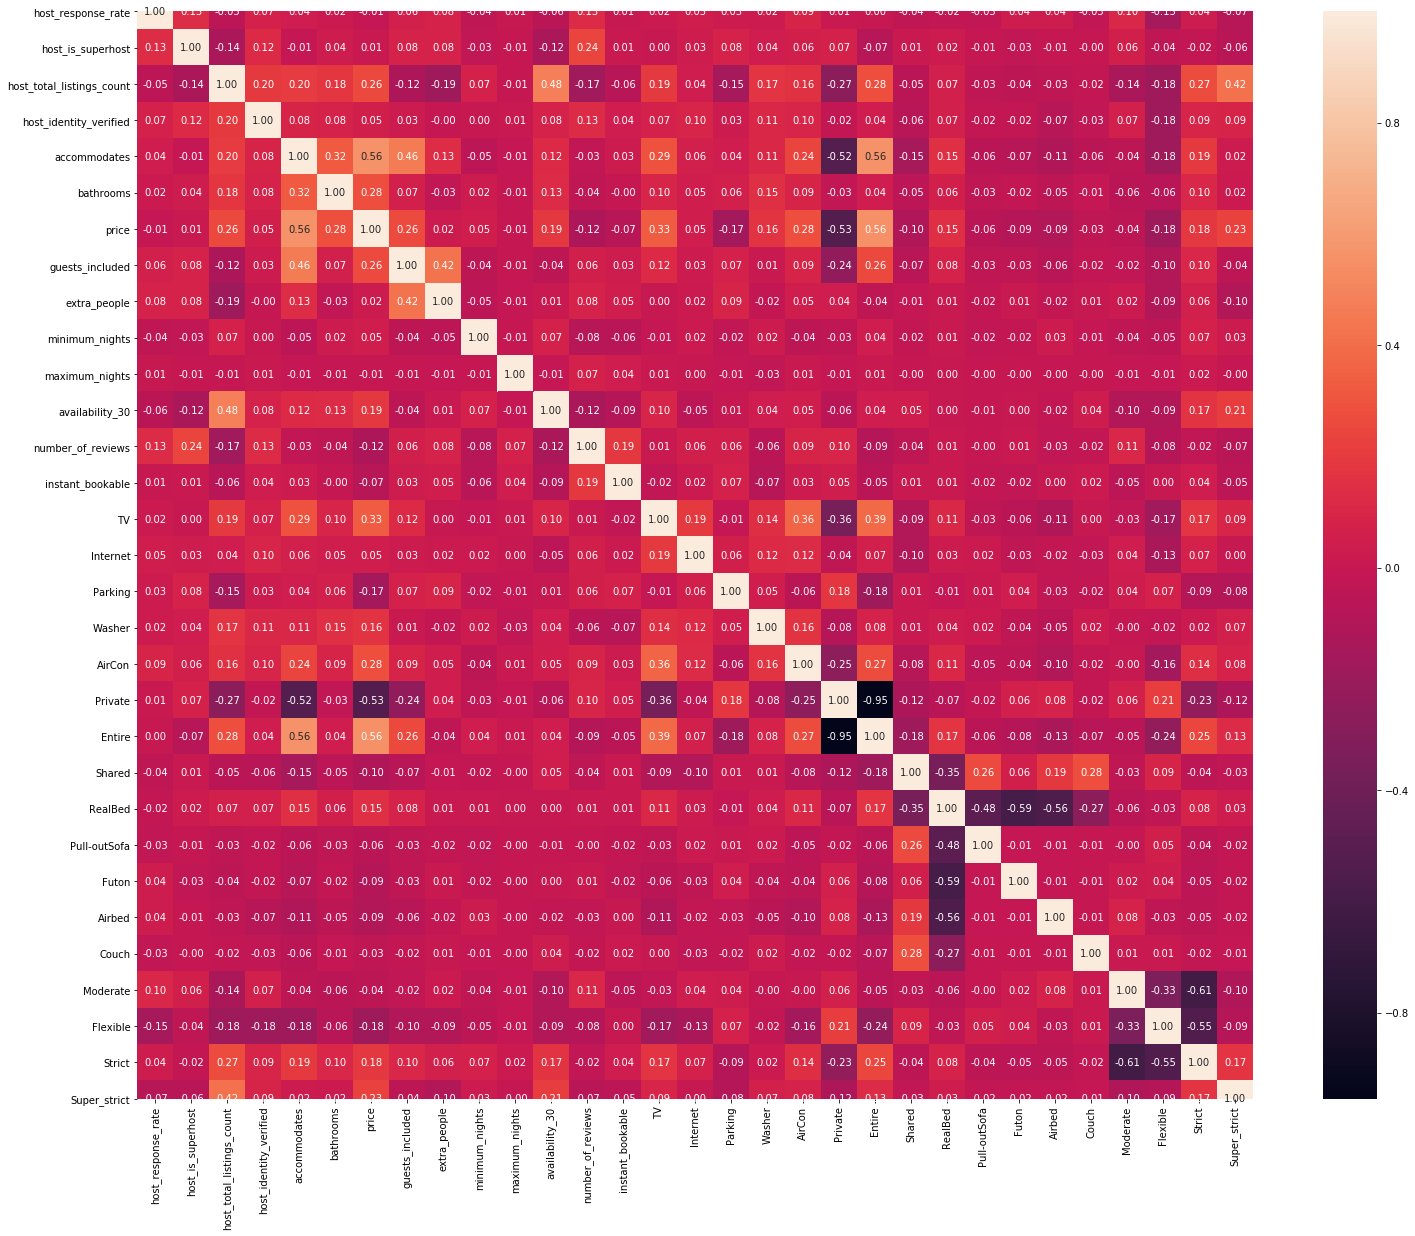

In [132]:
heat_map(boston,25,20)

## HEAT MAP FOR SEATTLE

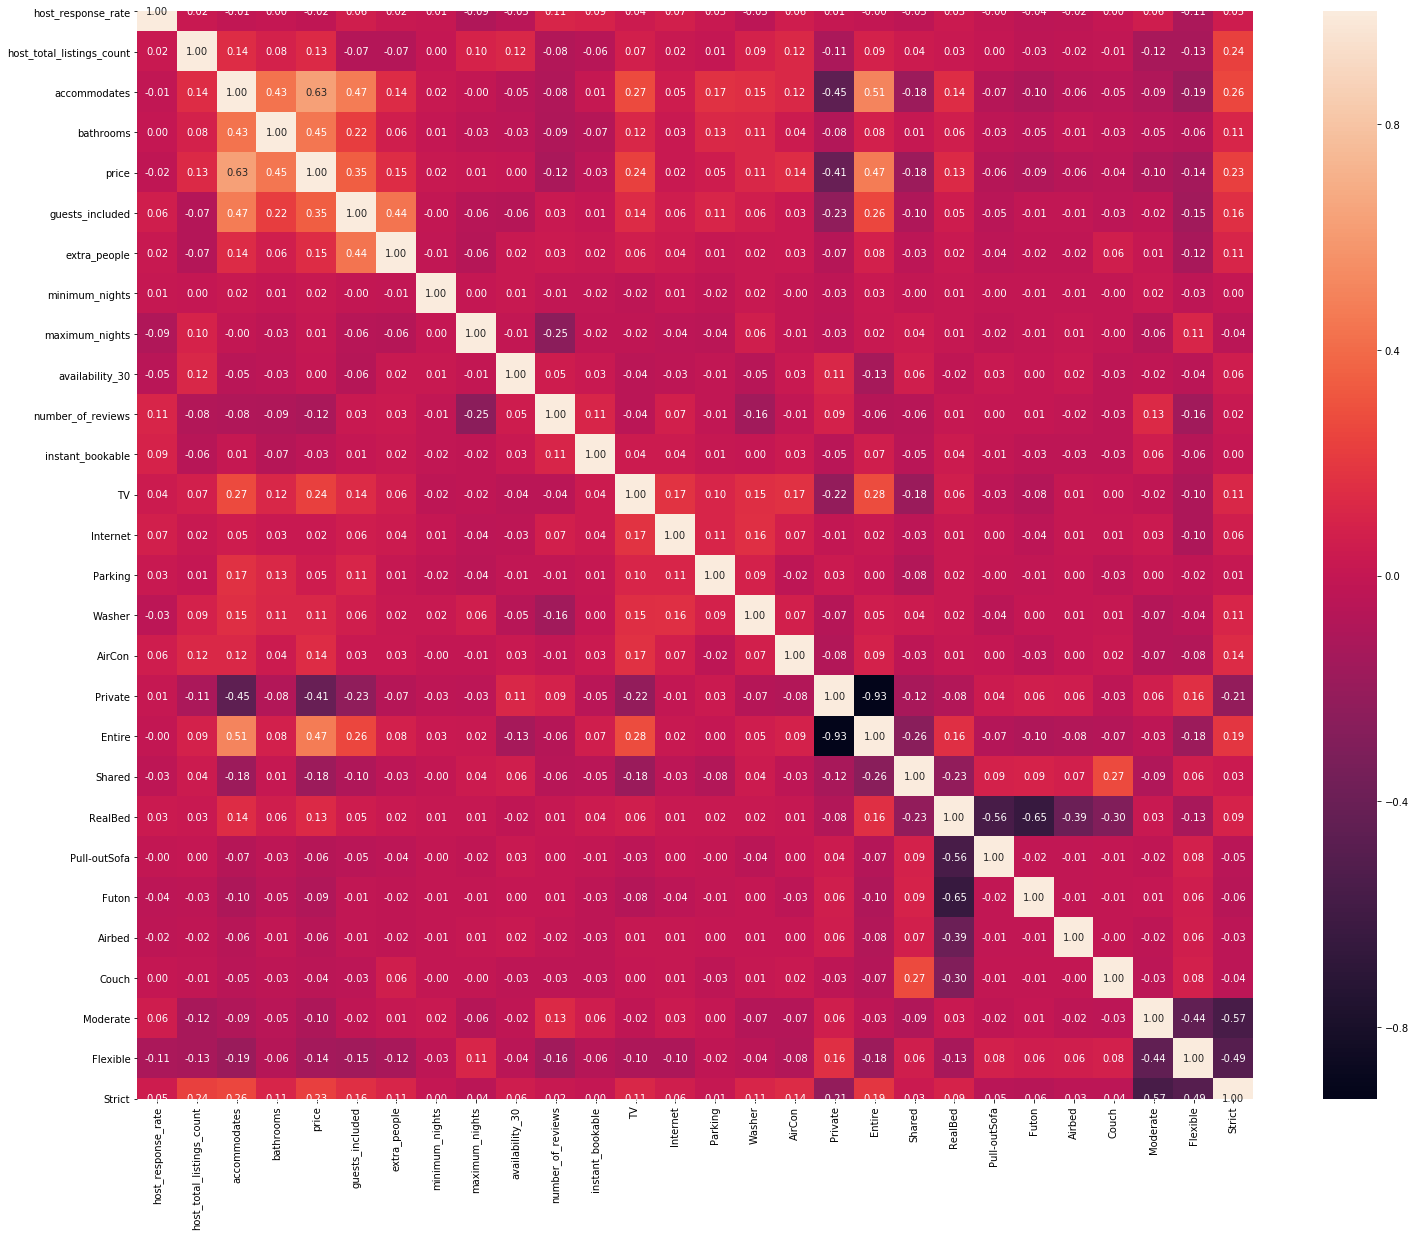

In [133]:
heat_map(seattle,25,20)

## Now, we will See How well our Model Predicts In Random Search

In [143]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor


In [174]:
def rand_model(features,target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25,random_state=42)
    from scipy.stats import randint
    # specify parameters and distributions to sample from
    param_dist = {"max_depth": randint(3,15),
                  "n_estimators" : [100, 1000],
                  "min_samples_split": randint(2, 11),
                  "bootstrap": [True, False],
                  "min_samples_leaf" : randint(1,10)
                                }
    n_iter_search = 43
    randommodel = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=5)
    randommodel.fit(X_train, y_train);

    pred = randommodel.predict(X_test)

    
    return r2_score(y_test, pred)

In [175]:
r2_rand_boston=rand_model(features_b,target_b)
r2_rand_seattle=rand_model(features_s,target_s)
print("R score for Boston :",r2_rand_boston)
print("R score for Seattle:",r2_rand_seattle)

R score for Boston : 0.578140662022802
R score for Seattle: 0.5518961660380581


## THANK YOU